In [8]:
import pandas as pd

data = pd.read_csv('1000_Companies.csv')

print(data.head(20))
data.info()

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [24]:
total_spend = data['R&D Spend'] + data['Administration'] + data['Marketing Spend']
print(total_spend)


0      774031.1000
1      757873.8200
2      662521.6000
3      646243.8800
4      599667.5300
          ...     
995    345819.6685
996    594564.1028
997    569344.6000
998    731800.6900
999    727563.7500
Length: 1000, dtype: float64


In [7]:
grouped_data = data.groupby('State')[['Marketing Spend','Profit']].sum().astype(int).reset_index()
print(grouped_data)

        State  Marketing Spend    Profit
0  California         77036823  41062058
1     Florida         74500502  38819324
2    New York         74667733  39664781


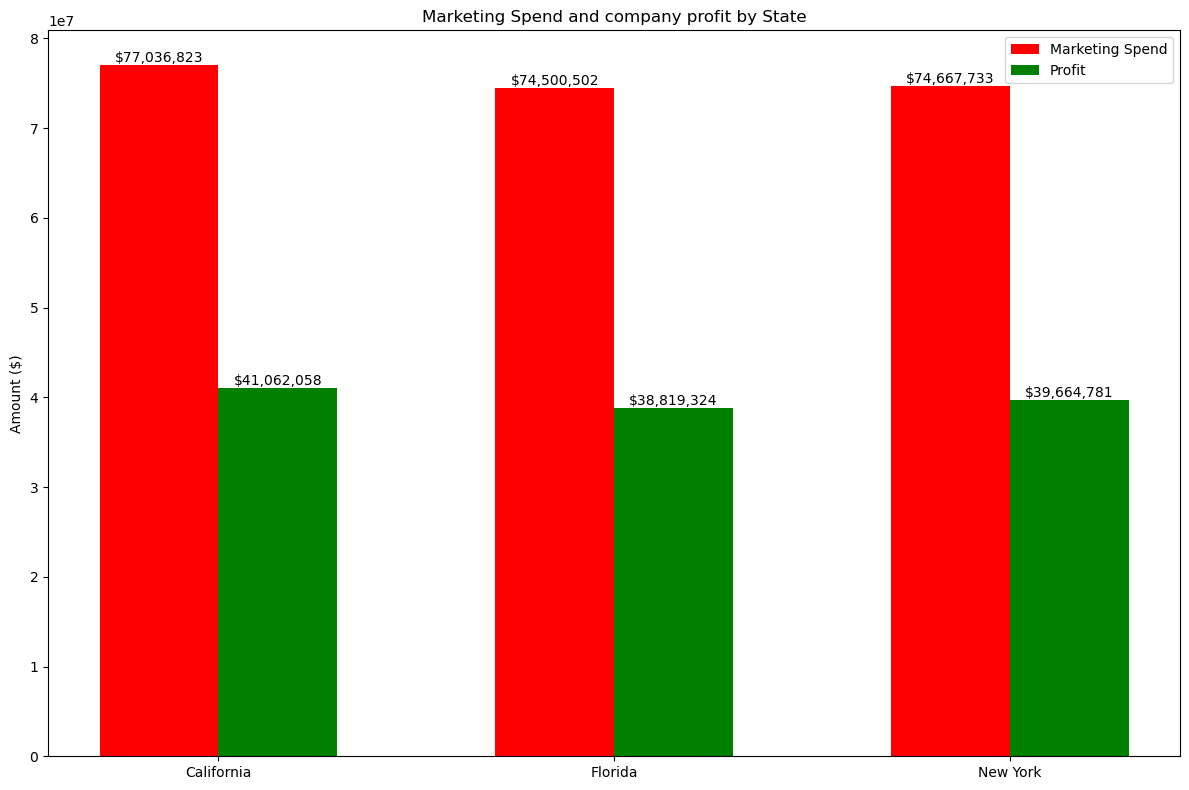

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
width = 0.30
x = list(range(len(grouped_data.index)))

ax.bar([i - width/2 for i in x], grouped_data['Marketing Spend'], width, label= 'Marketing Spend', color = 'red')
ax.bar([i + width/2 for i in x], grouped_data['Profit'], width, label= 'Profit', color = 'green')

ax.set_ylabel('Amount ($)')
ax.set_title('Marketing Spend and company profit by State')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['State'])
ax.legend()

for i, state in enumerate(grouped_data.index):
    ax.text(i - width/2, grouped_data.loc[state, 'Marketing Spend'], f'${grouped_data.loc[state, "Marketing Spend"]:,.0f}',
           ha = 'center', va = 'bottom')
    ax.text(i + width/2, grouped_data.loc[state, 'Profit'], f'${grouped_data.loc[state, "Profit"]:,.0f}',
           ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()